## Assignment 1: Machine Learning Methods

### Pranshu Raj Goel a1875750

#### How can we use data analytics to predict energy usage for this house?

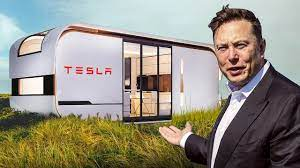


### 1. Read the dataset

In [1]:
#importing all needed libraries
from pathlib import Path  
from matplotlib import pyplot as plot
from pathlib import Path  
import pandas as pandas
import numpy as numpy
from sklearn.model_selection import train_test_split
import seaborn as seaborn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Extractign the data from dataset and dropping NA Columns
dataframe = pandas.read_csv("energydata_complete-1.csv")

In [3]:
# List of Constants and Configurations
TEST_SIZE_RATIO = 0.20
RANDOM_STATE_SEED = 1875750

### 2. Analyse and visualise the data

In [4]:
# Removing any N/A rows present
dataframe = dataframe.dropna()

In [5]:
# Preprocessing the dataframe to extract as much data as possible.
# TypeCase the datetimestamp from string to datetime format to facillitate easier extraction of data.
dataframe["date"] = pandas.to_datetime(dataframe['date'], format='%Y-%m-%d %H:%M:%S')
# Extracted Number of Seconds from Midnight(NSM), to check how day night cycle affect electricity consumption.
dataframe["NSM"] = (dataframe["date"] - pandas.to_datetime(dataframe['date'].dt.date, format='%Y-%m-%d')).dt.total_seconds()
# Extracted If the day was a weekday(1 for Mon - Fri; 0 Sat & Sun)
dataframe["week_status"] = dataframe["date"].apply(lambda date: 1 if(date.weekday() <= 4) else 0)
# Extracted If the day was Monday 
dataframe["day_of_monday"] = dataframe["date"].apply(lambda date: date.weekday() == 0)
# Extracted If the day was Tuesday 
dataframe["day_of_tuesday"] = dataframe["date"].apply(lambda date: date.weekday() == 1)
# Extracted If the day was Wednsday 
dataframe["day_of_wednesday"] = dataframe["date"].apply(lambda date: date.weekday() == 2)
# Extracted If the day was Thursday 
dataframe["day_of_thursday"] = dataframe["date"].apply(lambda date: date.weekday() == 3)
# Extracted If the day was Friday 
dataframe["day_of_friday"] = dataframe["date"].apply(lambda date: date.weekday() == 4)
# Extracted If the day was Saturday 
dataframe["day_of_saturday"] = dataframe["date"].apply(lambda date: date.weekday() == 5)
# Extracted If the day was Sunday 
dataframe["day_of_sunday"] = dataframe["date"].apply(lambda date: date.weekday() == 6)

In [6]:
# Droping Date column as we have extracted nessesary data.
# Furthermore, the prediction cannpt be performed on date as we only have data for few months rather than all year round.
dataframe = dataframe.drop("date", axis = 1).dropna()

In [7]:
# Printing First few Rows of dataset to verify if dataframe has been transformed correctly.
dataframe.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv2,NSM,week_status,day_of_monday,day_of_tuesday,day_of_wednesday,day_of_thursday,day_of_friday,day_of_saturday,day_of_sunday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,13.275433,61200.0,1,True,False,False,False,False,False,False
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.606195,61800.0,1,True,False,False,False,False,False,False
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,28.642668,62400.0,1,True,False,False,False,False,False,False
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.410389,63000.0,1,True,False,False,False,False,False,False
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,10.084097,63600.0,1,True,False,False,False,False,False,False


In [8]:
# Printing features in the dataset.
print(list(dataframe.columns))

['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'week_status', 'day_of_monday', 'day_of_tuesday', 'day_of_wednesday', 'day_of_thursday', 'day_of_friday', 'day_of_saturday', 'day_of_sunday']


In [9]:
# Printing schema of teh dataframe.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Appliances        19735 non-null  int64  
 1   lights            19735 non-null  int64  
 2   T1                19735 non-null  float64
 3   RH_1              19735 non-null  float64
 4   T2                19735 non-null  float64
 5   RH_2              19735 non-null  float64
 6   T3                19735 non-null  float64
 7   RH_3              19735 non-null  float64
 8   T4                19735 non-null  float64
 9   RH_4              19735 non-null  float64
 10  T5                19735 non-null  float64
 11  RH_5              19735 non-null  float64
 12  T6                19735 non-null  float64
 13  RH_6              19735 non-null  float64
 14  T7                19735 non-null  float64
 15  RH_7              19735 non-null  float64
 16  T8                19735 non-null  float6

In [10]:
# Printing stats about each feature in the dataset.
dataframe.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,week_status
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,42907.129465,0.722726
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,24940.020831,0.447664
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,21600.000000,0.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,43200.000000,1.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,64200.000000,1.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,85800.000000,1.000000


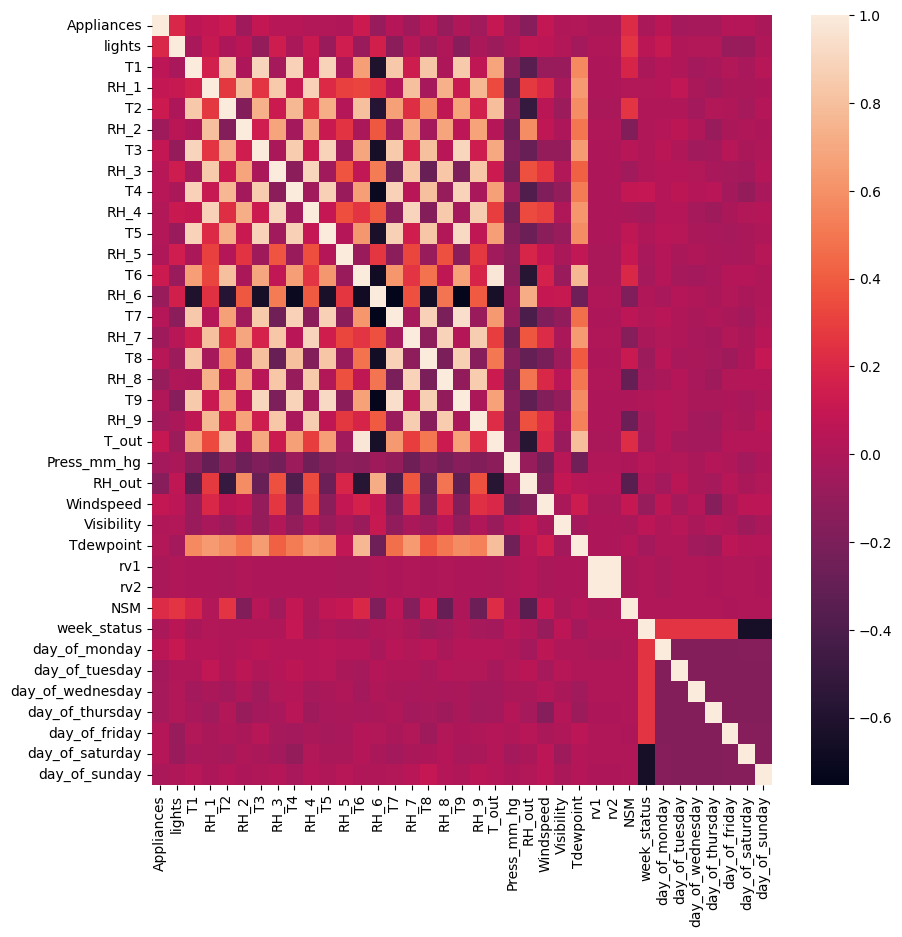

In [11]:
# Plot the inter-dependencies of feathers in the dataset with each other
plot.figure(figsize=(10, 10))
seaborn.heatmap(dataframe.corr(), xticklabels=dataframe.columns, yticklabels=dataframe.columns)
plot.show()

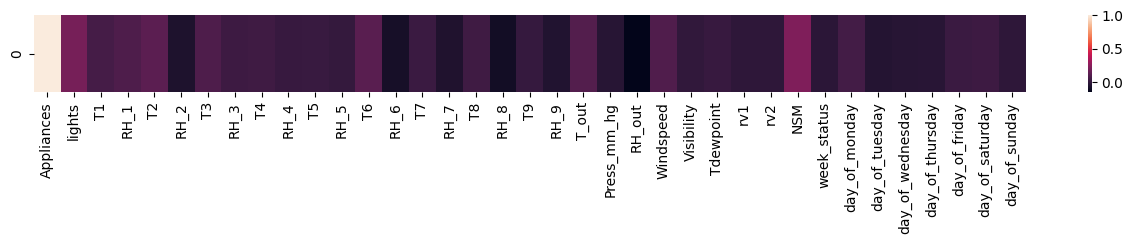

Feature Name 	Correleation
Appliances          1.00000
NSM                 0.21715
lights              0.19728
T2                  0.12007
T6                  0.11764
T_out               0.09915
Windspeed           0.08712
RH_1                0.08603
T3                  0.08506
T1                  0.05545
day_of_monday       0.05431
T4                  0.04028
T8                  0.03957
RH_3                0.03629
day_of_saturday     0.03346
day_of_friday       0.02773
T7                  0.02580
T5                  0.01976
RH_4                0.01697
Tdewpoint           0.01535
T9                  0.01001
RH_5                0.00695
Visibility          0.00023
day_of_sunday      -0.01087
rv1                -0.01114
rv2                -0.01114
week_status        -0.01744
day_of_thursday    -0.02928
day_of_wednesday   -0.03131
Press_mm_hg        -0.03488
day_of_tuesday     -0.04262
RH_9               -0.05146
RH_7               -0.05564
RH_2               -0.06046
RH_6               -0

In [12]:
# Plot the dependencies of features with respect to target Column: Appliances
plot.figure(figsize=(16, 1))
axes = seaborn.heatmap([dataframe.corrwith(dataframe["Appliances"])], xticklabels=dataframe.columns)
plot.show()

# Printing the correleation seperately onto console for more readability.
print("Feature Name \tCorreleation")
print(round(dataframe.corrwith(dataframe["Appliances"]).sort_values(ascending=False), 5))

In [61]:
# Seperating dependent(Appliances) and independant features(all features except Appliances) 
X = dataframe.drop("Appliances", axis = 1)
y = dataframe["Appliances"]

# Splitting the dataset into 2 parts for training and testing the model respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE_RATIO, random_state=RANDOM_STATE_SEED)

prediction_dataset = {
    "full": (X, y), 
    "train": (X_train, y_train), 
    "test": (X_test, y_test)
}

prediction_dataset_columns = list(prediction_dataset.keys())
metrics_columns = ["mean_absolute_error", "mean_absolute_percentage_error", "r2_score", "root_mean_square_error"]
model_list = ["GradientBoostingRegressor", "RandomForestRegressor"]

### 3. Implement prediction models

#### Gradient Boosted Regression

In [14]:
# Configuration for GBR
GBR_N_ESTIMATORS = 100
GBR_MAX_DEPTH_SET = [1, 2, 3]
GBR_VERBOSE = 1

# Declaring and Initilizing performance variable to score metrics
gbr_performance = pandas.DataFrame(data={"prediction_set": {}, "metric": {}, "depth": {}, "boosting_iteration": {}, "value": {}})
gbr_feature_importance = pandas.DataFrame()

# Applying Gradient Boosting Regression model to the dataset.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
gradient_boosting_regressor = GradientBoostingRegressor()

#### Random Forest

In [15]:
# Configuration for GBR
RFR_N_ESTIMATORS_SET = range(1,11)
RFR_VERBOSE = 1
RFR_RANDOM_STATE_SEED = RANDOM_STATE_SEED

# Declaring and Initilizing performance variable to score metrics
rfr_performance = pandas.DataFrame(data={"prediction_set": {}, "metric": {}, "n_estimators": {}, "value": {}})
rfr_feature_importance = pandas.DataFrame()

# Applying Gradient Boosting Regression model to the dataset.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
random_forest_regressor = RandomForestRegressor()

### 4. Train prediction models

#### Gradient Boosted Regression

In [16]:
for depth_iterator in GBR_MAX_DEPTH_SET:
    print("\nTraining Gradient Boosted Regression Model for MAX_DEPTH: %d" %depth_iterator)

    # Adding parameters for the SVR.
    gradient_boosting_regressor.set_params(n_estimators = GBR_N_ESTIMATORS)
    gradient_boosting_regressor.set_params(max_depth = depth_iterator)
    gradient_boosting_regressor.set_params( verbose = GBR_VERBOSE)

    # Parallelizing the training to speed up the training time.
    # Reference: https://scikit-learn.org/stable/computing/parallelism.html
    with joblib.parallel_backend(backend = "loky", n_jobs = -1):
        gradient_boosting_regressor.fit(X_train, y_train)
    
    # Calculate the metrics for the model.
    # Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
    for prediction_set in prediction_dataset.keys():
        # Helps predict the target values at each boositng iteration. 
        # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict
        for boosting_iteration, y_pred in enumerate(gradient_boosting_regressor.staged_predict(prediction_dataset[prediction_set][0])):
            gbr_performance.loc[len(gbr_performance)] = {
                "prediction_set": prediction_set,
                "metric": "root_mean_square_error",
                "depth": depth_iterator,
                "boosting_iteration": boosting_iteration + 1,
                "value": mean_squared_error(prediction_dataset[prediction_set][1], y_pred)
            }
            gbr_performance.loc[len(gbr_performance)] = {
                "prediction_set": prediction_set,
                "metric": "r2_score",
                "depth": depth_iterator,
                "boosting_iteration": boosting_iteration + 1,
                "value": r2_score(prediction_dataset[prediction_set][1], y_pred)
            }
            gbr_performance.loc[len(gbr_performance)] = {
                "prediction_set": prediction_set,
                "metric": "mean_absolute_error",
                "depth": depth_iterator,
                "boosting_iteration": boosting_iteration + 1,
                "value": mean_absolute_error(prediction_dataset[prediction_set][1], y_pred)
            }
            gbr_performance.loc[len(gbr_performance)] = {
                "prediction_set": prediction_set,
                "metric": "mean_absolute_percentage_error",
                "depth": depth_iterator,
                "boosting_iteration": boosting_iteration + 1,
                "value": mean_absolute_percentage_error(prediction_dataset[prediction_set][1], y_pred)
            }            

# Save the importance of the feature w.r.t the most important feature.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor.feature_importances_
feature_importance = gradient_boosting_regressor.feature_importances_
releative_feature_importance = (feature_importance / feature_importance.max()) * 100
sorted_indices=numpy.argsort(releative_feature_importance)
gbr_feature_importance = pandas.DataFrame(data = {"feature_names": X.columns[sorted_indices], "releative_feature_importance": releative_feature_importance[sorted_indices], "feature_importance": feature_importance[sorted_indices]})


Training Gradient Boosted Regression Model for MAX_DEPTH: 1
      Iter       Train Loss   Remaining Time 
         1       10102.1630            3.58s
         2        9964.1753            3.53s
         3        9851.7694            3.48s
         4        9759.8495            3.45s
         5        9684.8615            3.41s
         6        9623.5728            3.37s
         7        9566.2675            3.34s
         8        9518.4546            3.30s
         9        9474.0822            3.27s
        10        9436.3642            3.23s
        20        9144.2547            2.87s
        30        8974.1122            2.52s
        40        8858.9354            2.16s
        50        8770.2266            1.80s
        60        8699.1101            1.44s
        70        8640.0576            1.08s
        80        8590.1862            0.72s
        90        8545.6542            0.36s
       100        8506.1751            0.00s

Training Gradient Boosted Regression 

#### Random Forest Regression

In [17]:
for n_estimators in RFR_N_ESTIMATORS_SET:
    print(f"\nTraining Random Forest Regression Model for n_estimators: {n_estimators}")

    # Adding parameters for the RFR.
    random_forest_regressor.set_params(n_estimators = n_estimators)
    random_forest_regressor.set_params(n_jobs = -1)
    random_forest_regressor.set_params(random_state=RFR_RANDOM_STATE_SEED)
    random_forest_regressor.set_params(verbose = RFR_VERBOSE)

    #Start training the Model.
    random_forest_regressor.fit(X_train, y_train)
    
    # Calculate the metrics for the model.
    # Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
    for prediction_set in prediction_dataset.keys():
        # Helps predict the target values at each boositng iteration. 
        # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor.staged_predict
        y_pred = random_forest_regressor.predict(prediction_dataset[prediction_set][0])
        rfr_performance.loc[len(rfr_performance)] = {
            "prediction_set": prediction_set,
            "metric": "root_mean_square_error",
            "n_estimators": n_estimators,
            "value": mean_squared_error(prediction_dataset[prediction_set][1], y_pred)
        }
        rfr_performance.loc[len(rfr_performance)] = {
            "prediction_set": prediction_set,
            "metric": "r2_score",
            "n_estimators": n_estimators,
            "value": r2_score(prediction_dataset[prediction_set][1], y_pred)
        }
        rfr_performance.loc[len(rfr_performance)] = {
            "prediction_set": prediction_set,
            "metric": "mean_absolute_error",
            "n_estimators": n_estimators,
            "value": mean_absolute_error(prediction_dataset[prediction_set][1], y_pred)
        }
        rfr_performance.loc[len(rfr_performance)] = {
            "prediction_set": prediction_set,
            "metric": "mean_absolute_percentage_error",
            "n_estimators": n_estimators,
            "value": mean_absolute_percentage_error(prediction_dataset[prediction_set][1], y_pred)
        }            

# Save the importance of the feature w.r.t the most important feature.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_
feature_importance = random_forest_regressor.feature_importances_
releative_feature_importance = (feature_importance / feature_importance.max()) * 100
sorted_indices=numpy.argsort(releative_feature_importance)
rfr_feature_importance = pandas.DataFrame(data = {"feature_names": X.columns[sorted_indices], "releative_feature_importance": releative_feature_importance[sorted_indices], "feature_importance": feature_importance[sorted_indices]})


Training Random Forest Regression Model for n_estimators: 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 2


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 3


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 4


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 7


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.6s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 8


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 9


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



Training Random Forest Regression Model for n_estimators: 10


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


### 5. Test predictin models and show results

#### Gradient Boosting Regression

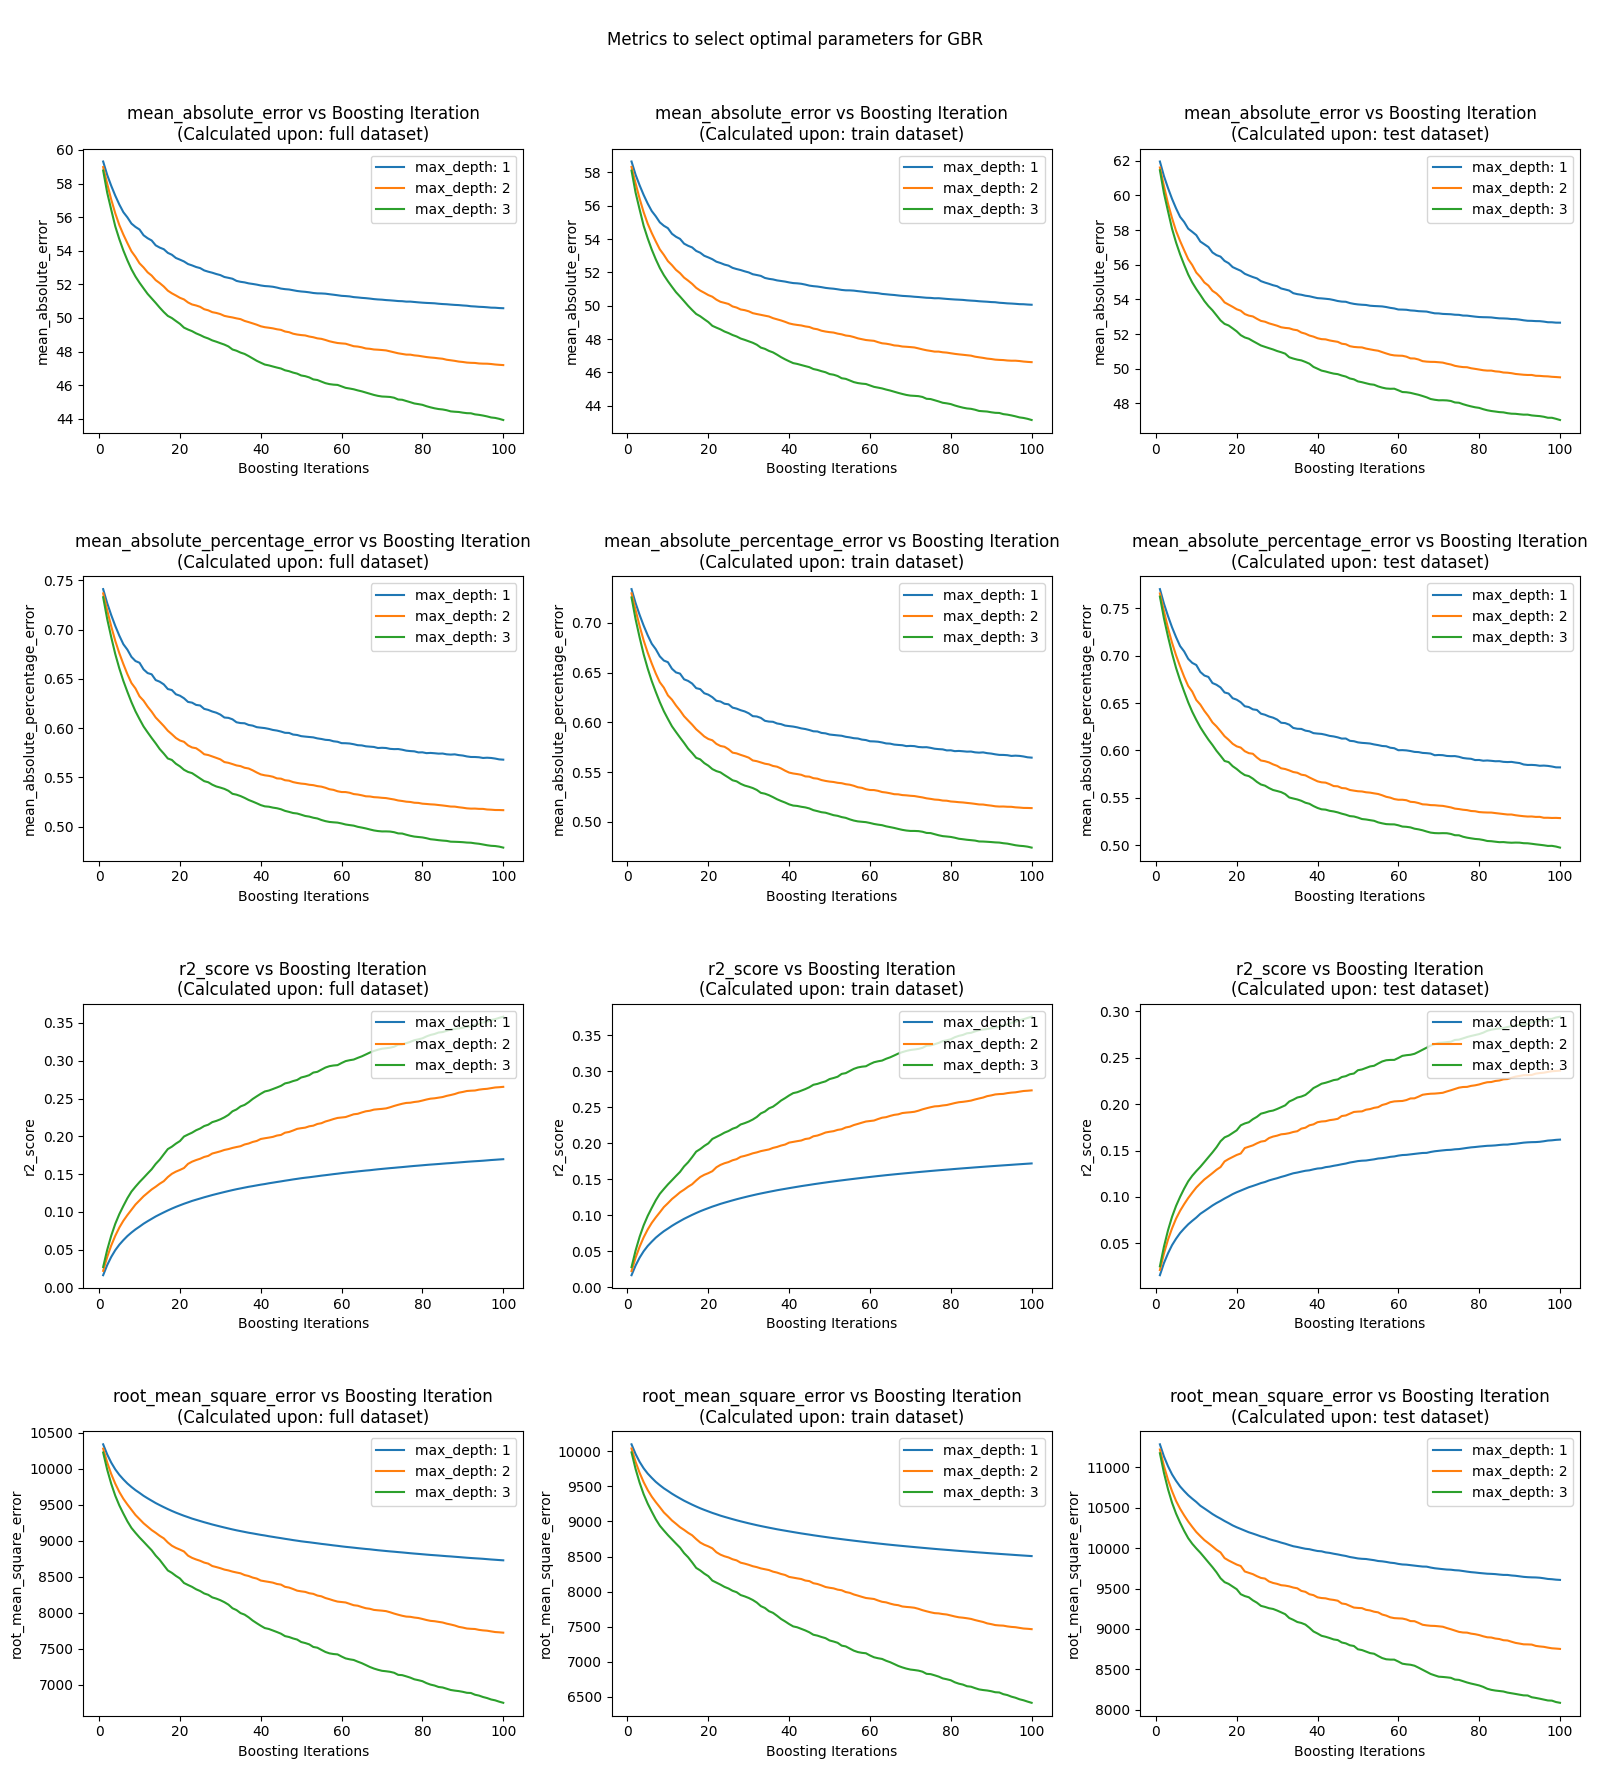

In [21]:
# Visualize model's metrics using line graph subplots.
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
figure, axesMatrix = plot.subplots(4,3)
plot.tight_layout()
graph_dataset = gbr_performance
for prediction_set in graph_dataset["prediction_set"].sort_values().unique():
    graph_pred = graph_dataset.where(graph_dataset["prediction_set"] == prediction_set).dropna()
    for metric in graph_pred["metric"].sort_values().unique():
        graph_pm = graph_pred.where(graph_pred["metric"] == metric).dropna()
        graph = axesMatrix[metrics_columns.index(metric), prediction_dataset_columns.index(prediction_set)]
        graph.set_title(f"\n\n{metric} vs Boosting Iteration\n(Calculated upon: {prediction_set} dataset)")
        graph.set_xlabel('Boosting Iterations')
        graph.set_ylabel(metric)
        for depth in graph_pm["depth"].sort_values().unique():
            graph_pmd = graph_pm.where(graph_pm["depth"] == depth).dropna()
            graph.plot(graph_pmd["boosting_iteration"], graph_pmd["value"], label = "max_depth: "  + str(int(depth)))
        graph.legend(loc='upper right')

figure.set_figheight(18)
figure.set_figwidth(16)
figure.suptitle("\nMetrics to select optimal parameters for GBR\n")
figure.tight_layout()
plot.show()


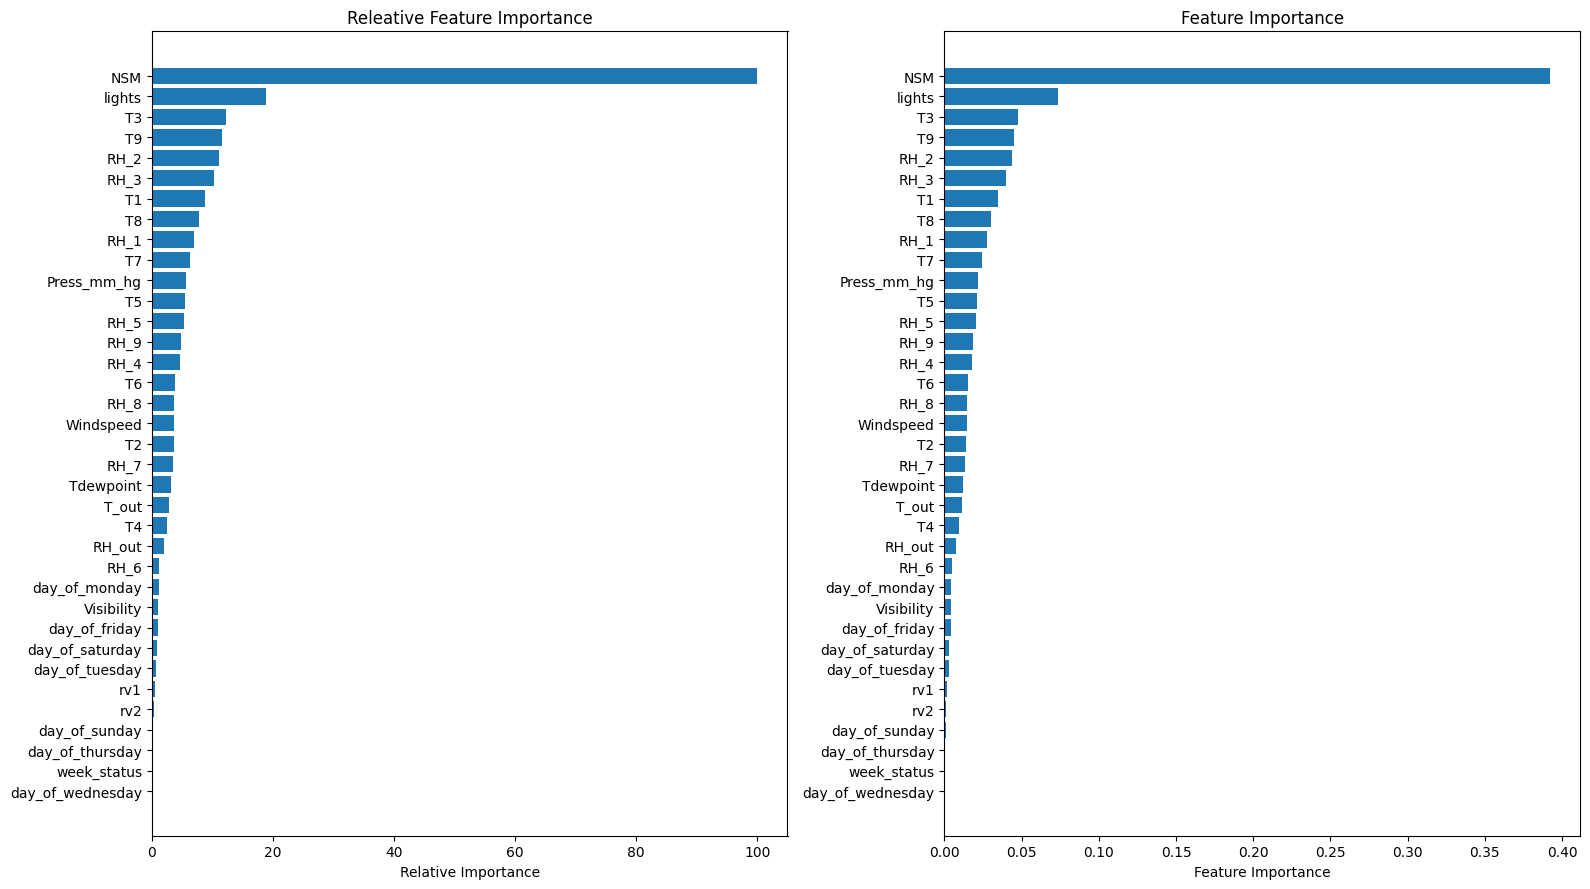

,feature_names,releative_feature_importance,feature_importance
35,NSM,100.000000,0.391968
34,lights,18.807766,0.073720
33,T3,12.170750,0.047705
32,T9,11.530140,0.045194
31,RH_2,11.093796,0.043484
30,RH_3,10.186736,0.039929
29,T1,8.838687,0.034645
28,T8,7.768618,0.030450
27,RH_1,7.022169,0.027525
26,T7,6.263332,0.024550


In [18]:
# Visualize feature importance of the model using bar graph subplots.
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
figure, (plot1, plot2) = plot.subplots(1, 2)

plot1.barh(gbr_feature_importance["feature_names"], gbr_feature_importance["releative_feature_importance"], align="center")
plot1.set_xlabel('Relative Importance')
plot1.set_title('Releative Feature Importance')

plot2.barh(gbr_feature_importance["feature_names"], gbr_feature_importance["feature_importance"], align="center")
plot2.set_xlabel('Feature Importance')
plot2.set_title('Feature Importance')

figure.set_figheight(9)
figure.set_figwidth(16)
figure.tight_layout()
plot.show()

gbr_feature_importance.sort_values(by=["releative_feature_importance"], ascending = False).head(len(X))

#### Random Forest Regression

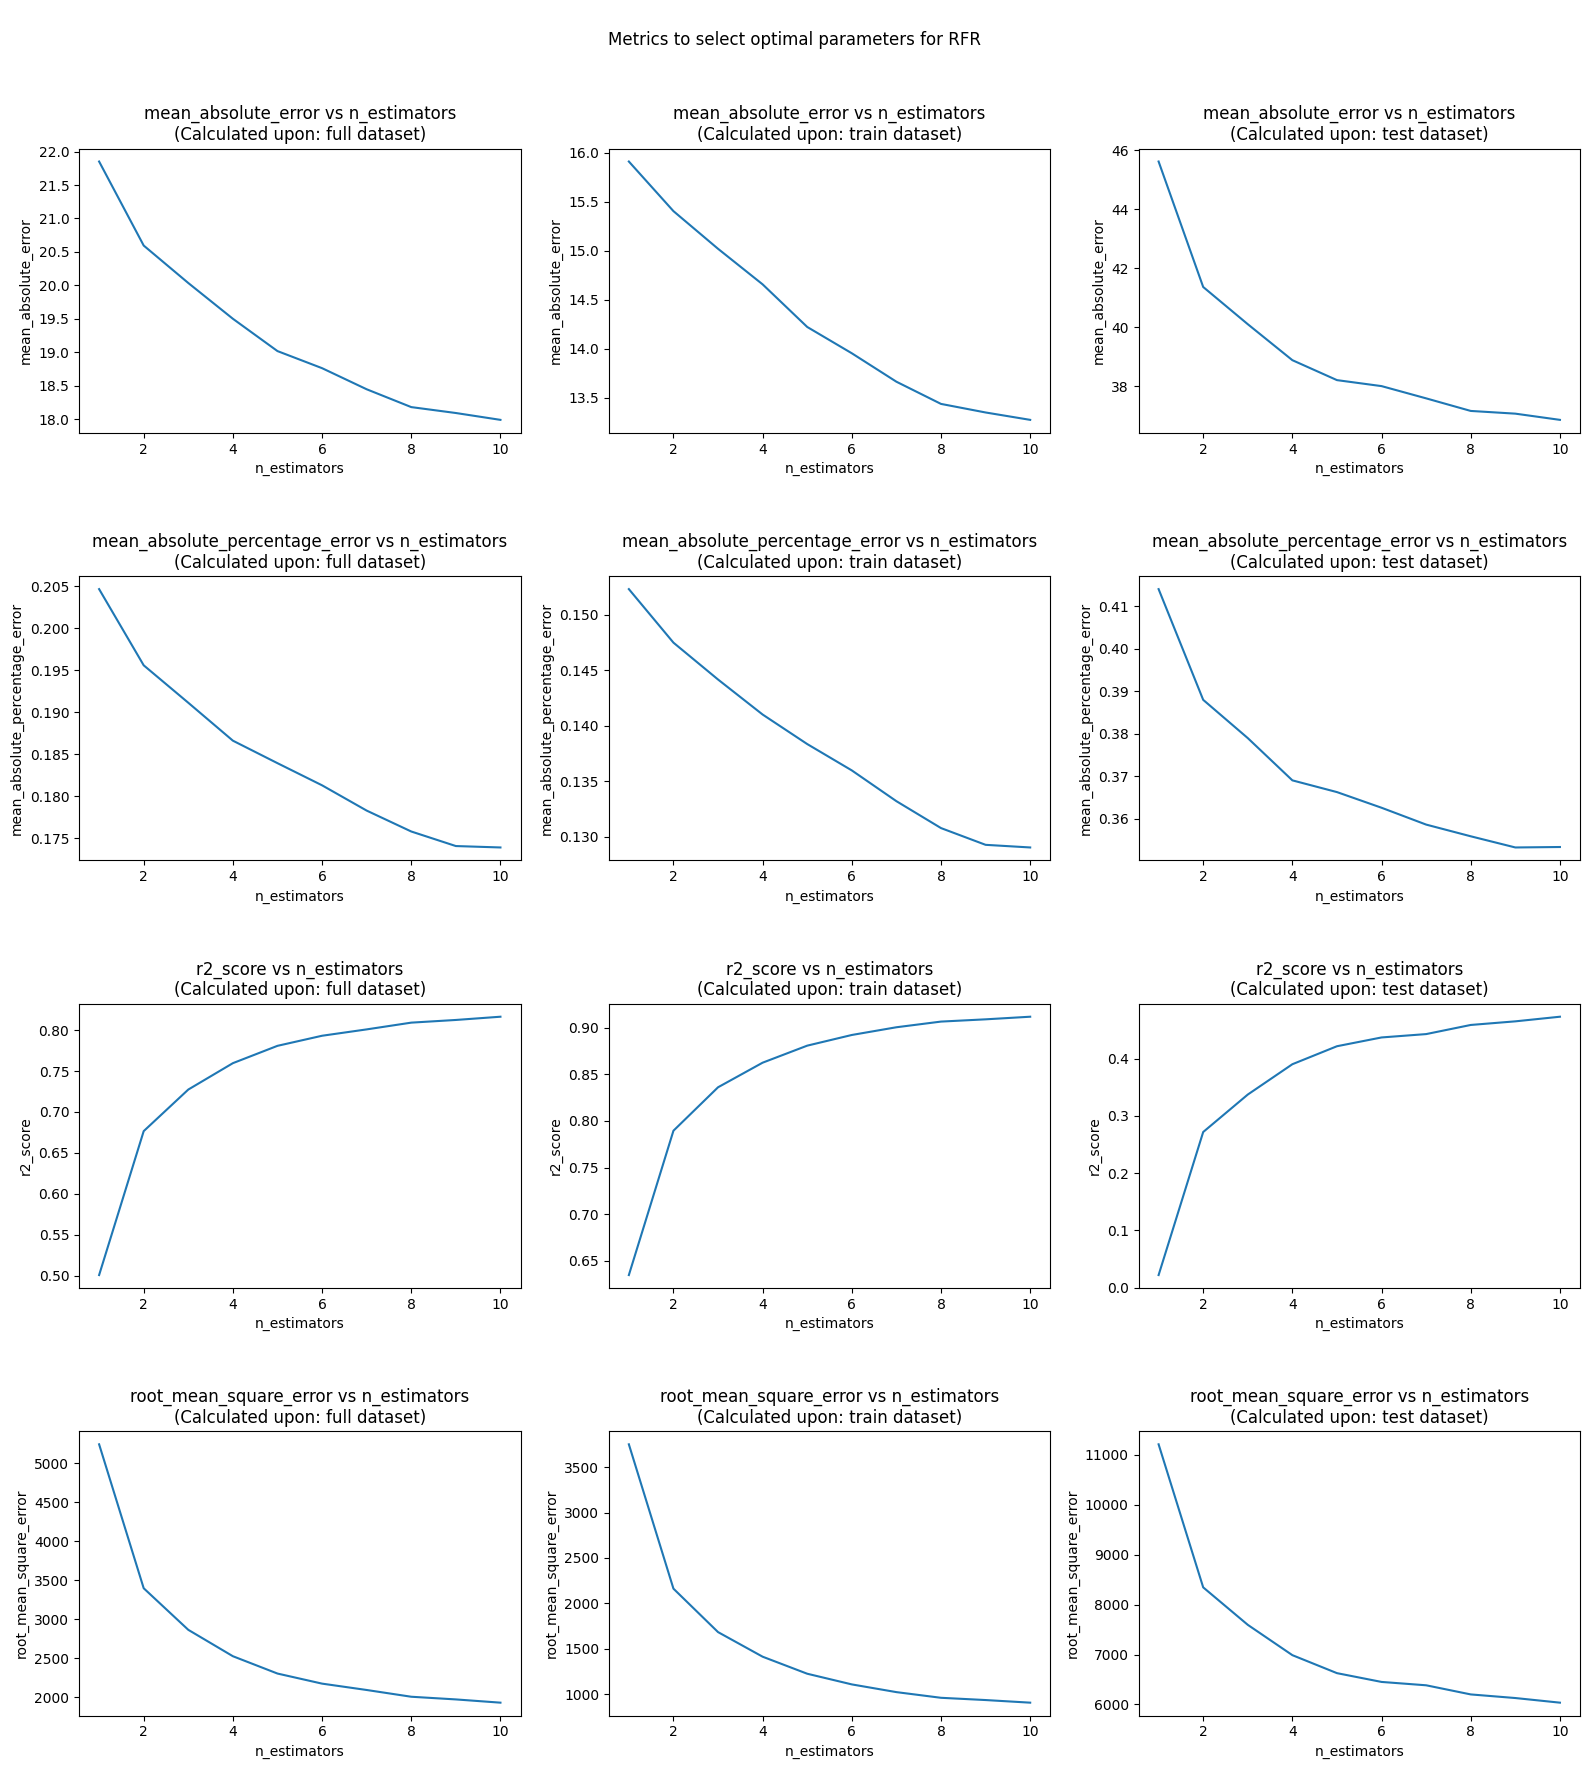

In [20]:
# Visualize model's metrics using line graph subplots.
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
figure, axesMatrix = plot.subplots(4,3)
plot.tight_layout()
graph_dataset = rfr_performance
for prediction_set in graph_dataset["prediction_set"].sort_values().unique():
    graph_pred = graph_dataset.where(graph_dataset["prediction_set"] == prediction_set).dropna()
    for metric in graph_pred["metric"].sort_values().unique():
        graph_pm = graph_pred.where(graph_pred["metric"] == metric).dropna()
        graph = axesMatrix[metrics_columns.index(metric), prediction_dataset_columns.index(prediction_set)]
        graph.set_title(f"\n\n{metric} vs n_estimators\n(Calculated upon: {prediction_set} dataset)")
        graph.set_xlabel('n_estimators')
        graph.set_ylabel(metric)
        graph.plot(graph_pm["n_estimators"], graph_pm["value"])

figure.set_figheight(18)
figure.set_figwidth(16)
figure.suptitle("\nMetrics to select optimal parameters for RFR\n")
figure.tight_layout()
plot.show()


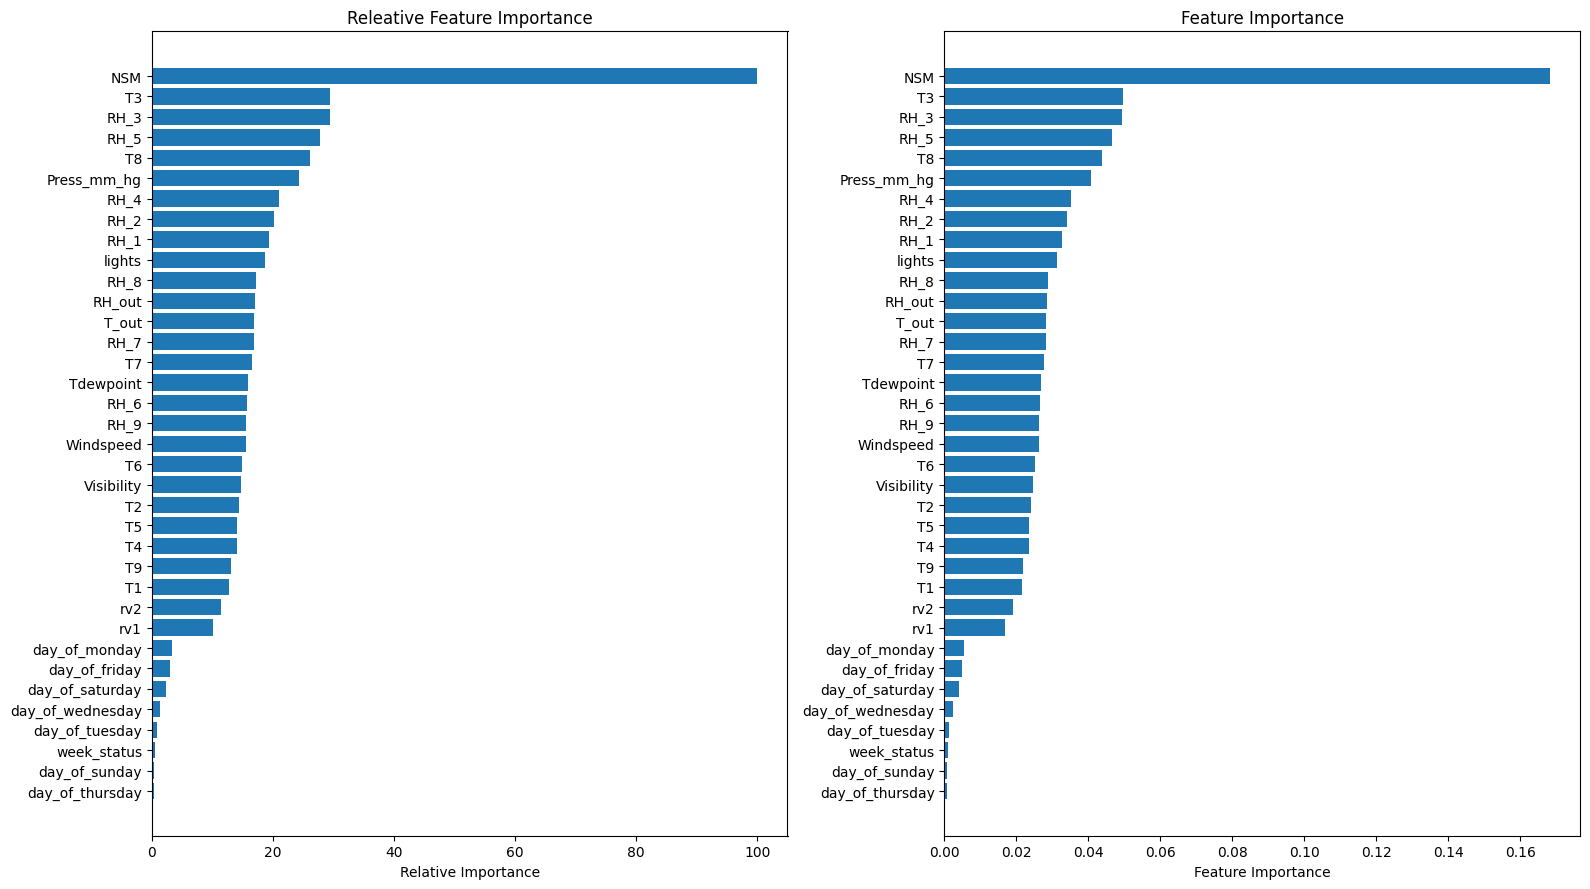

,feature_names,releative_feature_importance,feature_importance
35,NSM,100.000000,0.168125
34,T3,29.484021,0.049570
33,RH_3,29.360194,0.049362
32,RH_5,27.709920,0.046587
31,T8,26.099168,0.043879
30,Press_mm_hg,24.307034,0.040866
29,RH_4,20.928165,0.035185
28,RH_2,20.220046,0.033995
27,RH_1,19.383035,0.032588
26,lights,18.676961,0.031401


In [19]:
# Visualize feature importance of the model using bar graph subplots.
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
figure, (plot1, plot2) = plot.subplots(1, 2)

graph_dataset = rfr_feature_importance
plot1.barh(graph_dataset["feature_names"], graph_dataset["releative_feature_importance"], align="center")
plot1.set_xlabel('Relative Importance')
plot1.set_title('Releative Feature Importance')

plot2.barh(graph_dataset["feature_names"], graph_dataset["feature_importance"], align="center")
plot2.set_xlabel('Feature Importance')
plot2.set_title('Feature Importance')

figure.set_figheight(9)
figure.set_figwidth(16)
figure.tight_layout()
plot.show()

graph_dataset.sort_values(by=["releative_feature_importance"], ascending = False).head(len(X))

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [126]:
# Initilizing the best_performance dataframe to store best performance of models
best_performance = pandas.DataFrame(data={"prediction_set": {},"metric": {}, "model": {}, "value": {}})

for prediction_set in prediction_dataset_columns:
    for model in model_list:
        for metric in metrics_columns:
            # Initilizing the model_metric_dataframe dataframe depending upon the model's value
            model_metric_dataframe = pandas.DataFrame()
            if model == "GradientBoostingRegressor":
                model_metric_dataframe = gbr_performance
            elif model == "RandomForestRegressor":
                model_metric_dataframe = rfr_performance

            # Filter model_metric_dataframe to have data for iterated prediction_set & metric
            model_metric_dataframe = model_metric_dataframe.loc[((model_metric_dataframe["prediction_set"] == prediction_set) & (model_metric_dataframe["metric"] == metric))]
            
            # Partition over dataframe where 
            #   columns are grouped over columns("prediction_set", "metric") and 
            #   partitioned rows are ordered based on column("value")
            # Convert result into Dataframe
            model_metric_dataframe = model_metric_dataframe.sort_values("value").groupby(by = ["prediction_set", "metric"])["value"].apply(pandas.DataFrame)
            
            # Select column("value") by providing MultiIndex and dropping any N/A rows
            model_metric_dataframe = model_metric_dataframe[prediction_set, metric].dropna()

            # Inserting the values into best_performance dataframe
            best_performance.loc[len(best_performance)] = {
                "prediction_set": prediction_set, 
                "model": model, 
                "metric": metric, 
                "value": model_metric_dataframe.max() if "metric" == "r2_score" else model_metric_dataframe.min()
            }

# Pivot Table for better readability.
best_performance = pandas.pivot_table(best_performance, values="value", index = ["prediction_set", "metric"], columns = ["model"])

# Displaying the Resulting Table
best_performance.head(len(best_performance))

model                                          GradientBoostingRegressor  \
prediction_set metric                                                      
full           mean_absolute_error                             43.922740   
               mean_absolute_percentage_error                   0.478749   
               r2_score                                         0.016422   
               root_mean_square_error                        6746.216821   
test           mean_absolute_error                             47.045449   
               mean_absolute_percentage_error                   0.497592   
               r2_score                                         0.015587   
               root_mean_square_error                        8087.562281   
train          mean_absolute_error                             43.142062   
               mean_absolute_percentage_error                   0.474038   
               r2_score                                         0.016566   
               root_mean_square_error                        6410.880456   

model                                          RandomForestRegressor  
prediction_set metric                                                 
full           mean_absolute_error                         17.989916  
               mean_absolute_percentage_error               0.173910  
               r2_score                                     0.501016  
               root_mean_square_error                    1931.217482  
test           mean_absolute_error                         36.860654  
               mean_absolute_percentage_error               0.353216  
               r2_score                                     0.021798  
               root_mean_square_error                    6035.125158  
train          mean_absolute_error                         13.272232  
               mean_absolute_percentage_error               0.129057  
               r2_score                                     0.634639  
               root_mean_square_error                     905.240562

### 7. Reflect on what you have learned by completing this assignment

### 8. References

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

https://scikit-learn.org/stable/computing/parallelism.html

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor.staged_predict

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor.feature_importances_

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html